<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_Tax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


Open the MC Population by Standard Zip Codes

In [ ]:
mcZcta = pd.read_csv('mcZcta.csv')

In [ ]:
mcZcta.head()

,Unnamed: 0,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,62,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,102,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,33086.301965,3.274726e+07
2,111,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,5468.269608,1.437529e+06
3,112,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,32694.708048,2.192136e+07
4,113,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,30177.706413,2.337013e+07


In [ ]:
std_zip = mcZcta['ZCTA5N'].unique()

In [ ]:
mcZcta = mcZcta.loc[:, ~mcZcta.columns.str.contains('^Unnamed')]

In [ ]:
mcZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,33086.301965,3.274726e+07
2,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,5468.269608,1.437529e+06
3,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,32694.708048,2.192136e+07
4,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,30177.706413,2.337013e+07


# **Dataset: Real Property Tax**

## **Data Wrangling**

In [ ]:
import json
import requests

In [ ]:
#tax_json = requests.get('https://data.montgomerycountymd.gov/resource/q545-92hr.json')
#property_tax_0= pd.DataFrame(tax_json.json())

In [ ]:
property_tax_0 = pd.read_csv('Real_Property_Tax_-_2020.csv')

In [ ]:
property_tax_0.head()

,PARCEL CODE,RESIDENCE,PROPERTY ADDRESS,CITY,STATE,ZIP CODE,TAX CLASS,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL ASSESSMENT -,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PILOT EXEMPTION,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL PILOT EXEMPTION,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL,New Georeferenced Column
0,45986,NOT A PRINCIPAL RESIDENCE,OXFORD ST,NaN,MD,NaN,R038,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN
1,150491,NOT A PRINCIPAL RESIDENCE,CRABB AVE,NaN,MD,NaN,R050,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN
2,1624601,NOT A PRINCIPAL RESIDENCE,POPPYSEED LN,NaN,MD,NaN,R042,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN
3,308418,NOT A PRINCIPAL RESIDENCE,COLUMBIA PIK,NaN,MD,NaN,R038,20100,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,199.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,22.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-199.23,-199.23,22.51,NaN
4,311347,NOT A PRINCIPAL RESIDENCE,SNOWDEN DR,NaN,MD,NaN,R042,236900,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,2348.15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,265.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2613.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2613.48,NaN


In [ ]:
property_tax_0.shape

(343913, 71)

In [ ]:
property_tax_0.duplicated().sum()

0

In [ ]:
property_tax_0.columns

Index(['PARCEL CODE', 'RESIDENCE', 'PROPERTY ADDRESS', 'CITY', 'STATE',
       'ZIP CODE', 'TAX CLASS', 'ASSESSMENT', 'BARNESVILLE PROPERTY TAX',
       'BATTERY PARK PROPERTY TAX', 'BAY RESTORATION FUND',
       'BROOKEVILLE PROPERTY TAX', 'CH CH SECTION 3 PROPERTY TAX',
       'CH CH SECTION 5 PROPERTY TAX', 'CH CH TOWN PROPERTY TAX',
       'CH CH VIEW PROPERTY TAX', 'CH CH VILLAGE PROPERTY TAX',
       'County C-PACE Charge', 'COUNTY PROPERTY TAX', 'DBU ROAD',
       'DEV DIST SPECIAL ASSESSMENT -', 'DEV DIST SPECIAL TAX - KV',
       'DEV DIST SPECIAL TAX -WG', 'DRUMMOND PROPERTY TAX',
       'FRIENDSHIP HTS PROPERTY TAX', 'GAITHERSBURG PROPERTY TAX',
       'GAITHERSBURG STORMWATER FEE', 'GARRETT PARK PROPERTY TAX',
       'GLEN ECHO PROPERTY TAX', 'KENSINGTON PROPERTY TAX',
       'LAYTONSVILLE PROPERTY TAX', 'MARTINS ADDITION PROPERTY TAX',
       'NORTH CH CH PROPERTY TAX', 'OAKMONT PROPERTY TAX',
       'POOLESVILLE PROPERTY TAX', 'ROCKVILLE PROPERTY TAX',
       'ROCKVILLE R

In [ ]:
tax_col_sel = ['ZIP CODE', 'RESIDENCE', 'ASSESSMENT', 'COUNTY PROPERTY TAX', 'STATE PROPERTY TAX' ]
property_tax_sel = property_tax_0[tax_col_sel]

In [ ]:
property_tax_sel.isnull().sum()

ZIP CODE               19788
RESIDENCE                  0
ASSESSMENT                 0
COUNTY PROPERTY TAX        0
STATE PROPERTY TAX         0
dtype: int64

In [ ]:
property_tax_sel.head()

,ZIP CODE,RESIDENCE,ASSESSMENT,COUNTY PROPERTY TAX,STATE PROPERTY TAX
0,NaN,NOT A PRINCIPAL RESIDENCE,0,0.00,0.00
1,NaN,NOT A PRINCIPAL RESIDENCE,0,0.00,0.00
2,NaN,NOT A PRINCIPAL RESIDENCE,0,0.00,0.00
3,NaN,NOT A PRINCIPAL RESIDENCE,20100,199.23,22.51
4,NaN,NOT A PRINCIPAL RESIDENCE,236900,2348.15,265.33


In [ ]:
property_tax_sel = property_tax_sel.dropna()

In [ ]:
property_tax_sel['ZIP CODE'].nunique()

119

In [ ]:
property_tax = property_tax_sel[property_tax_sel['ZIP CODE'].isin(std_zip)]

In [ ]:
property_tax['ZIP CODE'].unique()

array([20817., 20814., 20872., 20876., 20912., 20906., 20902., 20852.,
       20904., 20910., 20895., 20841., 20853., 20901., 20832., 20855.,
       20861., 20879., 20850., 20886., 20871., 20854., 20874., 20815.,
       20877., 20866., 20878., 20905., 20837., 20833., 20882., 20851.,
       20842., 20839., 21771., 21797., 20838., 20903., 20868., 20707.,
       20816., 20818., 20862., 20812., 20860., 20777.])

In [ ]:
property_tax['ZIP CODE'] = property_tax['ZIP CODE'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
property_tax = property_tax[(property_tax['ASSESSMENT'] != 0) | 
                            (property_tax['STATE PROPERTY TAX'] != 0) | 
                            (property_tax['COUNTY PROPERTY TAX'] != 0)]

In [ ]:
property_tax.shape

(314745, 5)

In [ ]:
property_tax['COUNTY PROPERTY TAX percent'] = property_tax['COUNTY PROPERTY TAX'] / property_tax['ASSESSMENT'] * 100

## **Data Visualization**

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6) # global fugure size

Merge tow datasets property_tax and mcPop_stdZip by using the zip codes (ZCTA5N) from the dataset mcPop_stdZip

In [ ]:
mcPopTax = pd.merge(property_tax, mcZcta, left_on='ZIP CODE', right_on='ZCTA5N', how='right')

In [ ]:
mcPopTax.head()

,ZIP CODE,RESIDENCE,ASSESSMENT,COUNTY PROPERTY TAX,STATE PROPERTY TAX,COUNTY PROPERTY TAX percent,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,20707,PRINCIPAL RESIDENCE,472900,4687.38,529.65,0.991199,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,20707,PRINCIPAL RESIDENCE,382800,3794.31,428.74,0.991199,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
2,20707,PRINCIPAL RESIDENCE,387100,3836.94,433.55,0.991201,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
3,20707,PRINCIPAL RESIDENCE,445000,4410.84,498.40,0.991200,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
4,20707,PRINCIPAL RESIDENCE,489900,4855.89,548.69,0.991200,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07


In [ ]:
mcPopTax[mcPopTax['COUNTY PROPERTY TAX percent'] <= 0.5]['COUNTY PROPERTY TAX percent'].sum()

0.0

(array([   755.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,  38828.,      0., 275162.]),
 array([0.     , 0.05125, 0.1025 , 0.15375, 0.205  , 0.25625, 0.3075 ,
        0.35875, 0.41   , 0.46125, 0.5125 , 0.56375, 0.615  , 0.66625,
        0.7175 , 0.76875, 0.82   , 0.87125, 0.9225 , 0.97375, 1.025  ]),
 <a list of 20 Patch objects>)

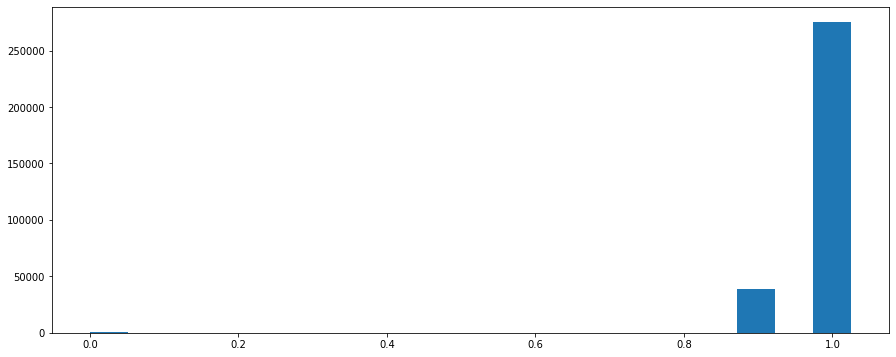

In [ ]:
plt.hist(mcPopTax['COUNTY PROPERTY TAX percent'], bins=20)

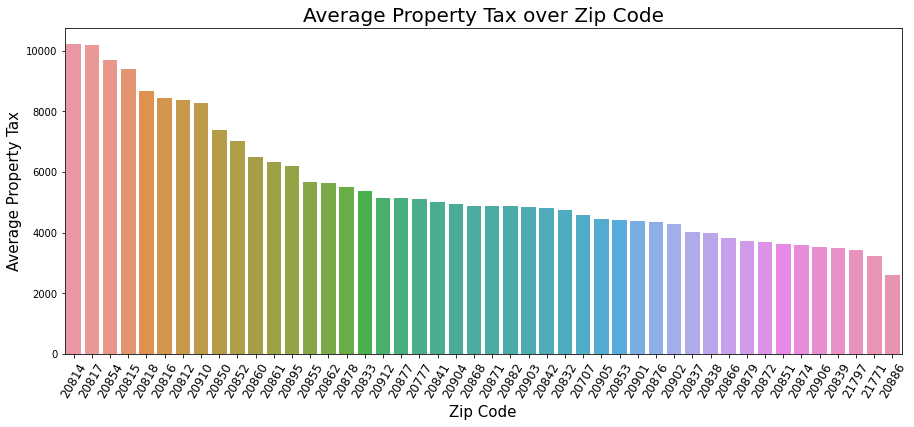

In [ ]:
by_zipcode = mcPopTax.groupby('ZCTA5N')['COUNTY PROPERTY TAX'].agg(np.mean).reset_index().sort_values('COUNTY PROPERTY TAX', ascending=False)
sns.barplot(data=mcPopTax, x='ZCTA5N', y='COUNTY PROPERTY TAX', order=by_zipcode['ZCTA5N'], ci=None)
plt.title('Average Property Tax over Zip Code', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Average Property Tax', size=15)
plt.show()

Any relationship between Property Tax and Population Type

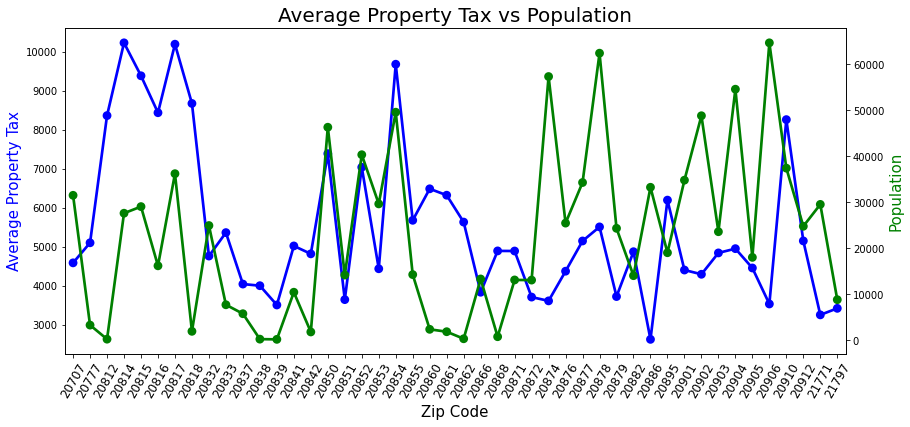

In [ ]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopTax, x='ZCTA5N', y='COUNTY PROPERTY TAX', color='blue', marker='o', ci=None)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopTax, x='ZCTA5N', y='POP100', color='green', marker='o')

ax.set_title('Average Property Tax vs Population', size=20)
ax.set_xticklabels(mcPopTax['ZCTA5N'].unique(), rotation=60, size=12) # ax.set_xticklabels(ax.get_xticklabels(), rotation=60, size=12)
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Average Property Tax', size=15, color='blue')
ax1.set_ylabel('Population', size=15, color='green')

plt.show()

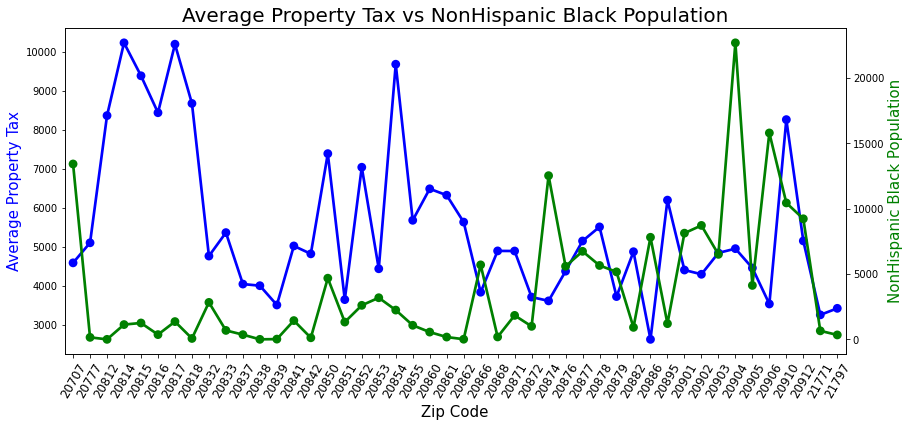

In [ ]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopTax, x='ZCTA5N', y='COUNTY PROPERTY TAX', color='blue', marker='o', ci=None)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopTax, x='ZCTA5N', y='NHB', color='green', marker='o')

ax.set_title('Average Property Tax vs NonHispanic Black Population', size=20)
ax.set_xticklabels(mcPopTax['ZCTA5N'].unique(), rotation=60, size=12)
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Average Property Tax', size=15, color='blue')
ax1.set_ylabel('NonHispanic Black Population', size=15, color='green')

plt.show()

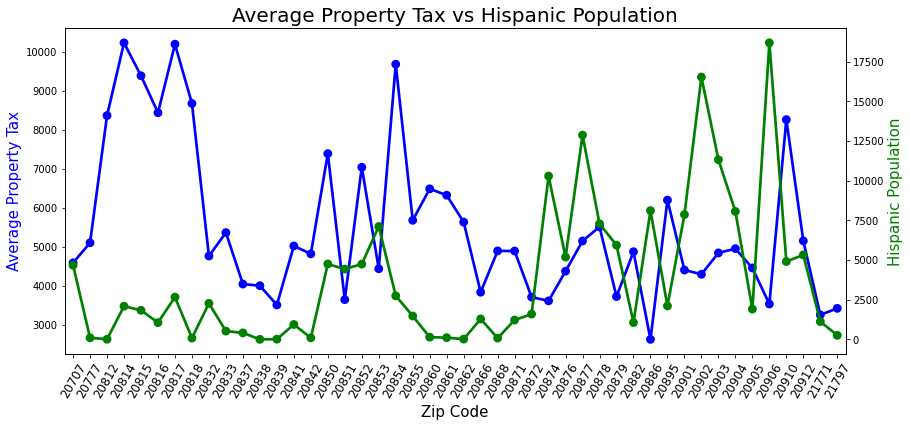

In [ ]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopTax, x='ZCTA5N', y='COUNTY PROPERTY TAX', color='blue', marker='o', ci=None)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopTax, x='ZCTA5N', y='HISP', color='green', marker='o')

ax.set_title('Average Property Tax vs Hispanic Population', size=20)
ax.set_xticklabels(mcPopTax['ZCTA5N'].unique(), rotation=60, size=12)
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Average Property Tax', size=15, color='blue')
ax1.set_ylabel('Hispanic Population', size=15, color='green')

plt.show()

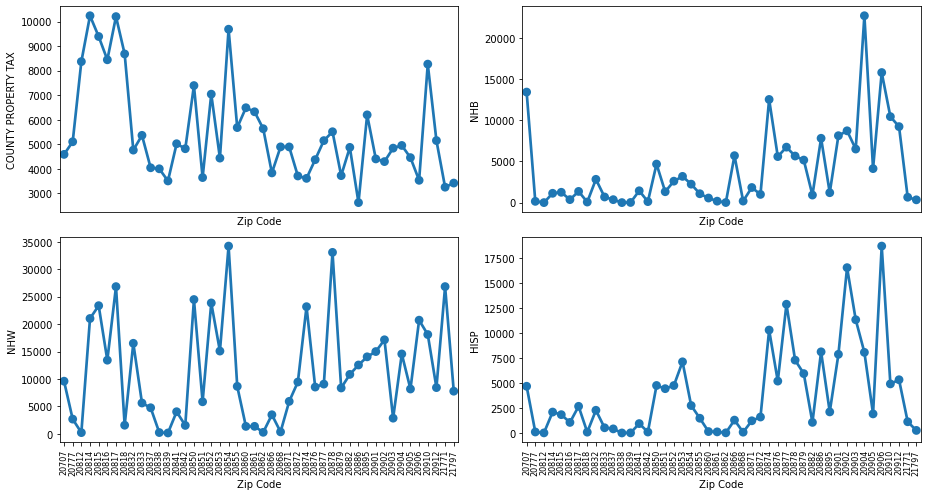

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=[13,7], sharex=True) # sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}
sns.pointplot(ax=ax[0,0], data=mcPopTax, x='ZCTA5N', y='COUNTY PROPERTY TAX', ci=None)
sns.pointplot(ax=ax[0,1], data=mcPopTax, x='ZCTA5N', y='NHB', ci=None)
sns.pointplot(ax=ax[1,0], data=mcPopTax, x='ZCTA5N', y='NHW', ci=None)
sns.pointplot(ax=ax[1,1], data=mcPopTax, x='ZCTA5N', y='HISP', ci=None)

ax[0,0].tick_params(bottom=False)
ax[0,1].tick_params(bottom=False)

ax[0,0].set_xlabel('Zip Code')
ax[0,1].set_xlabel('Zip Code')
ax[1,0].set_xlabel('Zip Code')
ax[1,1].set_xlabel('Zip Code')

ax[1,0].set_xticklabels(mcPopTax['ZCTA5N'].unique(), rotation=90, size=8)
ax[1,1].set_xticklabels(mcPopTax['ZCTA5N'].unique(), rotation=90, size=8)

fig.tight_layout()  # spcing between plots

plt.show()